***[netflix data analysis](https://)***


kalasava sahil govind bhai

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Exploratory data analysis tools
Specific statistical functions and techniques you can perform with EDA tools include:
Clustering and dimension reduction techniques, which help create graphical displays of high-dimensional data containing many variables. Univariate visualization of each field in the raw dataset, with summary statistics. Bivariate visualizations and summary statistics that allow you to assess the relationship between each variable in the dataset and the target variable you’re looking at. Multivariate visualizations, for mapping and understanding interactions between different fields in the data. K-means Clustering is a clustering method in unsupervised learning where data points are assigned into K groups, i.e. the number of clusters, based on the distance from each group’s centroid. The data points closest to a particular centroid will be clustered under the same category. K-means Clustering is commonly used in market segmentation, pattern recognition, and image compression. Predictive models, such as linear regression, use statistics and data to predict outcomes.



**Use Library in EDA On Netflix**

1)Numpy

2)Pandas

3)Matplotlib

4)Wordcloud

5)Plotly

**ED on netflix data **

In [12]:
movies=pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
movies.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [14]:
movies.shape

(8807, 12)

In [15]:
movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [20]:
# Number of Movies/Shows released year wise
px.bar(movies['release_year'].value_counts(),title='Number of shows/movies released year wise')

In [22]:
# Distribution of Duration for movies
px.bar(movies[movies.type=='Movie']['duration'].value_counts().sort_values(ascending=False).head(10))

In [23]:
# Distribution of Duration for movies
px.bar(movies[movies.type=='Movie']['duration'].value_counts().sort_values(ascending=False).head(16))

In [26]:
# Wordcloud of Categories of Movies/TV Shows
b=[]
for v in movies.listed_in.dropna():
    words=v.split(',')
    for w in words:
        if w in b:
            continue
        else:
            b.append(w.upper().strip())

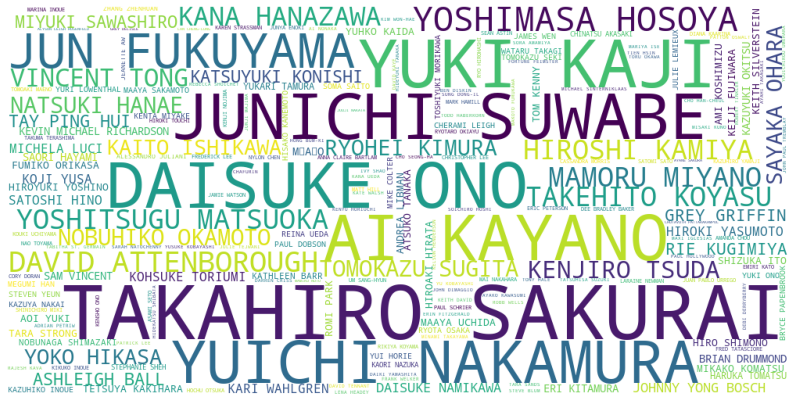

In [33]:
# Actors in a most TV Shows:
a=[]
for v in movies[movies.type=='TV Show'].cast.dropna():
    words=v.split(',')
    for w in words:
       
            a.append(w.upper().strip())
            
from collections import Counter
word_could_dict=Counter(a)
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(14,22))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

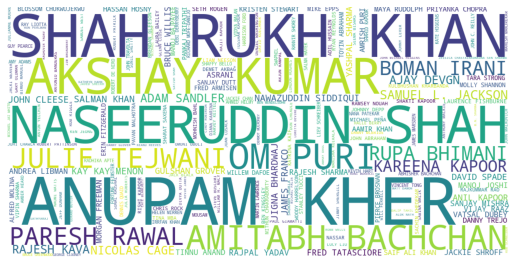

In [32]:
# Actors in most movie
a=[]
for v in movies[movies.type=='Movie'].cast.dropna():
    words=v.split(',')
    for w in words:
        a.append(w.upper().strip())
        
            
            
from collections import Counter
word_could_dict=Counter(a)
wordcloud = WordCloud(width = 1000, height = 500,background_color='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(9,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
df1=movies[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})   #displaying the total content of each type-movie,tv show every
#year from 2000 to upto this year
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2000] #dataframe after 2000
df2

Release Year     type  Total Content
75           2000    Movie             33
76           2000  TV Show              4
77           2001    Movie             40
78           2001  TV Show              5
79           2002    Movie             44
80           2002  TV Show              7
81           2003    Movie             51
82           2003  TV Show             10
83           2004    Movie             55
84           2004  TV Show              9
85           2005    Movie             67
86           2005  TV Show             13
87           2006    Movie             82
88           2006  TV Show             14
89           2007    Movie             74
90           2007  TV Show             14
91           2008    Movie            113
92           2008  TV Show             23
93           2009    Movie            118
94           2009  TV Show             34
95           2010    Movie            154
96           2010  TV Show             40
97           2011    Movie            145
98           2011  TV Show             40
99           2012    Movie            173
100          2012  TV Show             64
101          2013    Movie            225
102          2013  TV Show             63
103          2014    Movie            264
104          2014  TV Show             88
105          2015    Movie            398
106          2015  TV Show            162
107          2016    Movie            658
108          2016  TV Show            244
109          2017    Movie            767
110          2017  TV Show            265
111          2018    Movie            767
112          2018  TV Show            380
113          2019    Movie            633
114          2019  TV Show            397
115          2020    Movie            517
116          2020  TV Show            436
117          2021    Movie            277
118          2021  TV Show            315

In [35]:
#line graph
df1=movies[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2000]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on netflix')
fig3.show() #displaying the above data as line chart